In [1]:
%matplotlib inline

In [2]:
#导入数据集
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


In [3]:
#将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [4]:
#编码数据
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
#将训练和测试标签向量化
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
#模型定义，使用包含64个单位的维度更大的层，输出46个类别。
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
#编译模型
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [8]:
#留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
#训练20轮
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.4452 - acc: 0.6877 - val_loss: 1.3460 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0954 - acc: 0.7653 - val_loss: 1.1717 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8698 - acc: 0.8158 - val_loss: 1.0809 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.7031 - acc: 0.8477 - val_loss: 0.9849 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5663 - acc: 0.8801 - val_loss: 0.9414 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.4580 - acc: 0.9044 - val_loss: 0.9083 - val_acc: 0.8020


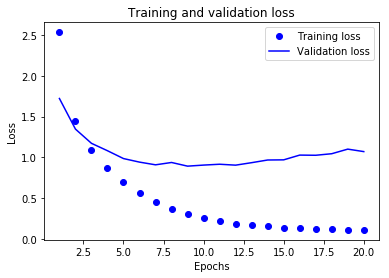

In [10]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

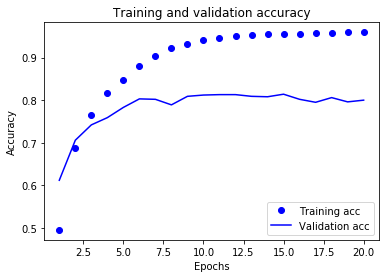

In [11]:
#绘制训练精度和验证精度
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#从头开始训练一个模型（9个轮次）
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 133us/step - loss: 1.3711 - acc: 0.7121 - val_loss: 1.2755 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.0137 - acc: 0.7790 - val_loss: 1.1296 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.7975 - acc: 0.8254 - val_loss: 1.0541 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.6391 - acc: 0.8629 - val_loss: 0.9747 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5116 - acc: 0.8929 - val_loss: 0.9092 - val_acc: 0.8160
Epoch 7/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.4112 - acc: 0.9141 - val_loss: 0.8937 - val_acc: 0.8210
Epoch 8

In [13]:
print(results)

[1.0229808972121772, 0.77604630459448321]


In [16]:
#在新数据上生成预测结果
predictions = model.predict(x_test)
#predictions 中的每个元素都是长度为 46 的向量。
print(predictions[0].shape)

#这个向量的所有元素总和为 1。

print(np.sum(predictions[0]))

#最大的元素就是预测类别,即概率最大的类别。
print(np.argmax(predictions[0]))

(46,)
1.0
3
